In this notebook we will demonstrate the operation of some of the functions used in the solution on a small toy time series.

In [ ]:
import sys
sys.path.append('../src')
import selection_utils
import extraction_utils
import toy_utils

In [2]:
toy_ts = toy_utils.get_toy_ts()

In [3]:
toy_ts

,price_mean,id
event_time,,
0,0,0
1,5,1
2,7,2
3,6,3
4,4,4
5,3,5
6,1,6
7,2,7
8,8,8


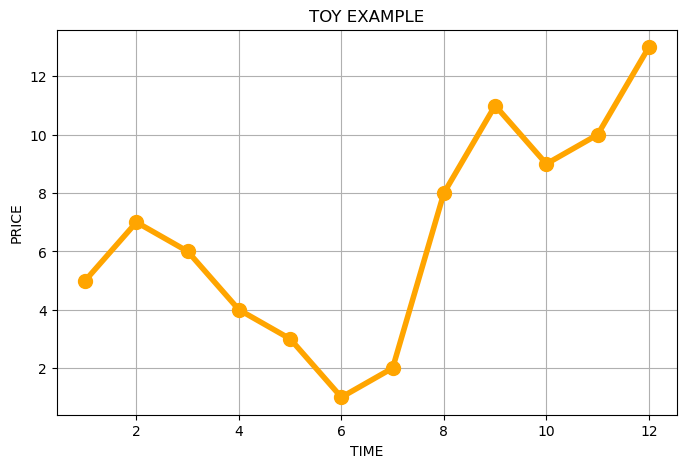

In [4]:
toy_utils.plot_toy_ts(toy_ts)

`bcv_extract_features` works as follows:

- calculates the columns `target`, `lags` and `time features`

> because of this target and lags values at the beginning and at the end of the series will be deleted, because they will have `Nan`\
> also in our case all time features values are 0, because `event_time` is an integer

- divides all space into equal `n_blocks` of parts

- inside each of them it tries to slice close to the end `n_windows` windows of size `window_size`

- within the counted windows a large number of statistical features from `tsfresh` (about 800) are counted

**Let's make sure of it!**

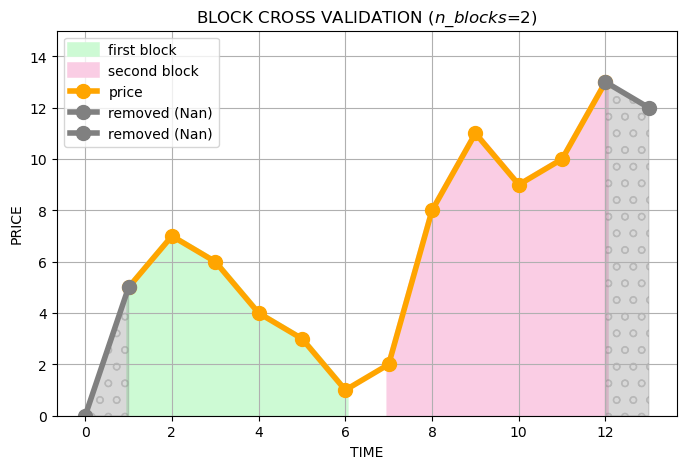

In [5]:
toy_utils.plot_blocks(toy_ts)

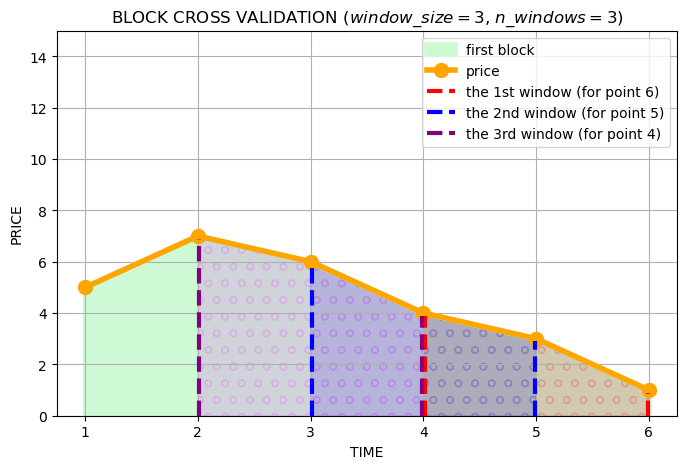

In [6]:
toy_utils.plot_windows(toy_ts)

In [ ]:
train_list = extraction_utils.bcv_extract_features(
    df=toy_ts,
    n_blocks=2,
    n_windows=3,
    window_size=3,
    target_col='price_mean')

In [8]:
print(f'id of the first block: {train_list[0]["id"].values}')

id of the first block: [4 5 6]


In [9]:
print(f'id of the second block: {train_list[1]["id"].values}')

id of the second block: [10 11 12]


In [10]:
print("Information from the first block on the outermost `n_windows` windows with features counted from `tsfresh`:")
train_list[0]

Information from the first block on the outermost `n_windows` windows with features counted from `tsfresh`:


,price_mean,id,price_lag1,target,hour,min,sec,ms,price_mean__variance_larger_than_standard_deviation,price_mean__has_duplicate_max,...,price_mean__fourier_entropy__bins_5,price_mean__fourier_entropy__bins_10,price_mean__fourier_entropy__bins_100,price_mean__permutation_entropy__dimension_3__tau_1,price_mean__permutation_entropy__dimension_4__tau_1,price_mean__permutation_entropy__dimension_5__tau_1,price_mean__permutation_entropy__dimension_6__tau_1,price_mean__permutation_entropy__dimension_7__tau_1,price_mean__query_similarity_count__query_None__threshold_0.0,price_mean__mean_n_absolute_max__number_of_maxima_7
0,4,4,6.0,-25.000000,0,0,0,0,1.0,0.0,...,0.693147,0.693147,0.693147,-0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,5,4.0,-66.666667,0,0,0,0,1.0,0.0,...,0.693147,0.693147,0.693147,-0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,6,3.0,100.000000,0,0,0,0,1.0,0.0,...,0.693147,0.693147,0.693147,-0.0,0.0,0.0,0.0,0.0,0.0,0.0


After splitting into blocks and counting the features from `tsfresh`, we can measure the statistical significance of all the features and leave only the relevant ones among them. This will allow us to **reduce the dimensionality** of the features.

In [ ]:
relevance_table = selection_utils.get_stats(train_list)

In [12]:
relevance_table

,feature,type,p_value,relevant
feature,,,,
"price_mean__agg_autocorrelation__f_agg_""var""__maxlag_40","price_mean__agg_autocorrelation__f_agg_""var""__...",real,0.227016,False
price_mean__benford_correlation,price_mean__benford_correlation,real,0.251118,False
"price_mean__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.2","price_mean__change_quantiles__f_agg_""mean""__is...",real,0.329880,False
"price_mean__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.4","price_mean__change_quantiles__f_agg_""mean""__is...",real,0.329880,False
price_mean__number_crossing_m__m_1,price_mean__number_crossing_m__m_1,binary,0.333333,False
...,...,...,...,...
price_mean__permutation_entropy__dimension_5__tau_1,price_mean__permutation_entropy__dimension_5__...,constant,NaN,False
price_mean__permutation_entropy__dimension_6__tau_1,price_mean__permutation_entropy__dimension_6__...,constant,NaN,False
price_mean__permutation_entropy__dimension_7__tau_1,price_mean__permutation_entropy__dimension_7__...,constant,NaN,False


Since the sample size in our example is too small, we have no relevant attributes. In practice this is not the case. Let's assume that the first 120 attributes are relevant.

In [ ]:
relevance_table['relevant'].loc[:120] = True

After that we want to select a set of low-correlated features among all the relevant ones. This is done by the function `selection_utils.stats_select_features`

In [14]:
stats_selected_features = selection_utils.stats_select_features(relevance_table)

In [15]:
len(stats_selected_features)

84

We see that the size of the features has already decreased from 120 to 84.

In [16]:
stats_selected_features[:10]

['price_mean__standard_deviation',
 'price_mean',
 'price_mean__last_location_of_maximum',
 'price_mean__linear_trend__attr_"intercept"',
 'price_mean__minimum',
 'price_mean__sum_of_reoccurring_values',
 'price_mean__ar_coefficient__coeff_0__k_10',
 'price_lag1',
 'price_mean__quantile__q_0.1',
 'price_mean__mean_n_absolute_max__number_of_maxima_7']

After that, we can make an additional selection with the help of the `importance technique`. 

On each block we will train an `XGBregressor`, with which we will then calculate the importance of the features in various ways. By averaging them over the blocks and leaving only the most important features, we will get the final set.

In [17]:
# train models

test_size = 1
n_jobs = 8

train = [df[stats_selected_features + ['target']][:-test_size] for df in train_list]
test = [df[stats_selected_features + ['target']][-test_size:] for df in train_list]
models = selection_utils.get_fitted_models(train, n_jobs)

current model: 1/2
********************....................
[03:03:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1667849653518/work/src/learner.cc:767: 
Parameters: { "njobs" } are not used.

current model: 2/2
****************************************
[03:03:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1667849653518/work/src/learner.cc:767: 
Parameters: { "njobs" } are not used.



In [ ]:
importances = selection_utils.get_importance(models, train, mode='all') 
imps_selected_features = [el[0] for el in selection_utils.importance_select_features(importances, 0.8)]

In [19]:
for feature in imps_selected_features:
    print(feature)

price_mean
price_mean__standard_deviation


We see that the final set of features (after generation with tsfresh, selection by statistical hypotheses, and importance of the features by all fouls of block cross validation) turned out to be as follows:

- `price_mean`
- `price_mean__standard_deviation`


**Note**
This result is unreproducible. Because of the toy size of the fdataset, our results are mostly random.

This notebook was created to clarify the general steps of the proposed utility feature generation solution.